# Group 10

Chamika Gunarathna

In [1]:
print("Add Individual contribution From this Cell, delete this print msg after initiation")

Add Individual contribution From this Cell, delete this print msg after initiation


Sasmeetha Perera

In [3]:
import pandas as pd

df = pd.read_csv('data.csv')

In [4]:
df.head()

,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_10,gene_11,gene_12,gene_13,...,gene_41,gene_42,gene_43,gene_44,gene_45,gene_46,gene_47,gene_48,gene_49,Class
0,2.325242,3.247092,8.174007,10.065053,7.487446,0.000000,0.0,0.000000,2.759582,0.0,...,0.0,0.000000,0.566572,2.759582,7.149066,9.382985,11.393793,11.642183,0.000000,1
1,3.446190,3.620962,7.171917,9.796559,8.175245,1.972509,0.0,1.972509,2.218967,0.0,...,0.0,0.000000,0.000000,0.000000,7.292138,10.073097,8.763408,11.354894,0.791689,1
2,2.554196,1.296134,8.770277,10.462901,8.013993,0.000000,0.0,0.736562,3.543446,0.0,...,0.0,0.414785,0.000000,6.290605,6.865300,9.681449,8.968667,11.782720,0.414785,1
3,3.667699,3.083179,7.997292,9.516886,7.925424,0.732486,0.0,0.000000,3.762157,0.0,...,0.0,0.000000,0.000000,0.000000,7.258726,10.100321,9.391772,11.355979,0.000000,1
4,3.821935,3.717605,7.593100,10.205964,7.613185,0.000000,0.0,0.000000,1.982364,0.0,...,0.0,0.000000,0.000000,2.261441,8.054105,10.471025,8.439449,11.730143,0.000000,1


In [5]:
print(df.describe())

           gene_1      gene_2      gene_3      gene_4      gene_6      gene_7  \
count  390.000000  390.000000  390.000000  390.000000  390.000000  390.000000   
mean     3.025948    3.192807    6.834967    9.785579    7.330231    0.482853   
std      1.246116    1.049015    0.737371    0.497189    1.032067    0.513565   
min      0.000000    0.000000    5.009284    8.435999    4.534466    0.000000   
25%      2.341329    2.490260    6.347902    9.444469    6.615592    0.000000   
50%      3.165172    3.216300    6.735995    9.761957    7.433040    0.442652   
75%      3.857806    3.836318    7.161614   10.125391    7.995617    0.755208   
max      6.237034    5.848044   10.129528   11.269372   10.219132    2.779008   

          gene_10     gene_11     gene_12     gene_13  ...     gene_41  \
count  390.000000  390.000000  390.000000  390.000000  ...  390.000000   
mean     0.663875    0.904628    2.654270    0.233360  ...    0.093538   
std      1.096418    0.903066    0.693793    0.5

1. K-Means Clustering

In [14]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

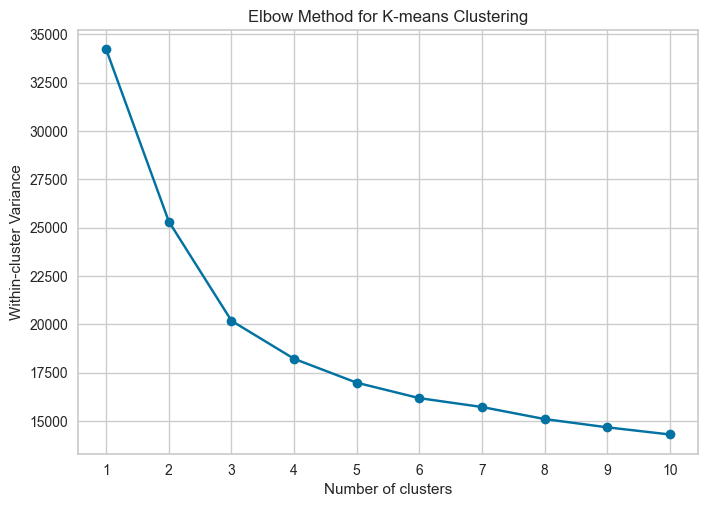

In [15]:
df1 = pd.read_csv('data.csv')

#Defining attributes and categories
attributes = df1.iloc[:, 0:44]
categories = df1.iloc[:, -1]

#Calculate within-cluster variance for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(attributes)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')  # Adjusted x-axis range
plt.title('Elbow Method for K-means Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Variance')
plt.xticks(np.arange(1, 11, 1))  # Show all integer ticks on x-axis
plt.grid(True)
plt.savefig('elbow_method_plot.png')
plt.show()

In [16]:
import pandas as pd
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
cluster_labels = kmeans.fit_predict(attributes) + 1

df1['Cluster'] = cluster_labels

print(df1)

       gene_1    gene_2    gene_3     gene_4    gene_6    gene_7   gene_10  \
0    2.325242  3.247092  8.174007  10.065053  7.487446  0.000000  0.000000   
1    3.446190  3.620962  7.171917   9.796559  8.175245  1.972509  0.000000   
2    2.554196  1.296134  8.770277  10.462901  8.013993  0.000000  0.000000   
3    3.667699  3.083179  7.997292   9.516886  7.925424  0.732486  0.000000   
4    3.821935  3.717605  7.593100  10.205964  7.613185  0.000000  0.000000   
..        ...       ...       ...        ...       ...       ...       ...   
385  0.000000  1.886433  7.052959   9.965753  7.085977  0.000000  1.008272   
386  0.000000  4.154988  5.868203  10.381900  7.353509  0.000000  0.000000   
387  1.256286  2.155684  6.898692   9.994891  7.849955  0.489235  0.489235   
388  2.423255  3.190883  7.171527   9.156098  7.191207  1.287945  0.566182   
389  1.455281  2.775535  5.009284   9.995894  7.806421  0.000000  0.000000   

      gene_11   gene_12   gene_13  ...   gene_42   gene_43   ge

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
cluster_labels = kmeans.fit_predict(attributes) + 1

df1['Cluster'] = cluster_labels
# Evaluate clustering quality using Silhouette coefficient
silhouette_avg = silhouette_score(attributes, cluster_labels)
print("Silhouette Coefficient:", silhouette_avg)

# Calculate purity
def calculate_purity(labels_true, labels_pred):
    cluster_labels = pd.Series(labels_pred)
    true_labels = pd.Series(labels_true)
    matrix = pd.crosstab(cluster_labels, true_labels)
    return np.sum(np.max(matrix, axis=0)) / np.sum(matrix.values)

# True labels are in the last column of the dataframe
true_labels = df1.iloc[:, -2].values
purity = calculate_purity(true_labels, cluster_labels)
print("Purity:", purity)

Silhouette Coefficient: 0.16551778429701616
Purity: 0.8615384615384616


2. K-Medoids Clustering

In [20]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score

df2 = pd.read_csv('data.csv')

X = df2.drop(columns=['Class'])

n_clusters = 5

kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)

kmedoids.fit(X)

cluster_labels = kmedoids.labels_

cluster_medoids = kmedoids.cluster_centers_

silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

db_index = davies_bouldin_score(X, cluster_labels)
print("Davies–Bouldin index:", db_index)

true_labels = df2.iloc[:, -1].values
purity = calculate_purity(true_labels, cluster_labels)
print("Purity:", purity)


Silhouette Score: 0.17392066991528263
Davies–Bouldin index: 2.6331428791262725
Purity: 0.7307692307692307


3. DBSCAN Clustering

In [21]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score

df3 = pd.read_csv('data.csv')
x = df3.drop(columns=['Class'])

dbscan = DBSCAN(eps=6, min_samples=5)
cluster_labels = dbscan.fit_predict(x)

silhouette = silhouette_score(x, cluster_labels)
print("Silhouette Score:", silhouette)

rand_index = adjusted_rand_score(df3.iloc[:,-1], cluster_labels)
print(f"Adjusted Rand Index: {rand_index}")

true_labels = df3.iloc[:, -1].values
purity = calculate_purity(true_labels, cluster_labels)
print("Purity:", purity)

Silhouette Score: 0.12086391058514394
Adjusted Rand Index: 0.3621602472278582
Purity: 0.7256410256410256


4. Agglomerative Clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering

df4 = pd.read_csv('data.csv')
x = df4.drop(columns=['Class'])

hierarchical = AgglomerativeClustering(n_clusters=5)

hierarchical.fit(x)

cluster_labels = hierarchical.labels_

silhouette = silhouette_score(x, cluster_labels)
print("Silhouette Score:", silhouette)

true_labels = df4.iloc[:, -1].values
purity = calculate_purity(true_labels, cluster_labels)
print("Purity:", purity)


Silhouette Score: 0.22211101718731305
Purity: 0.8307692307692308


Sanjitha Amarathunga

In [3]:
print("Add Individual contribution From this Cell, delete this print msg after initiation")

Add Individual contribution From this Cell, delete this print msg after initiation


Umesha Sewwandi

In [4]:
print("Add Individual contribution From this Cell, delete this print msg after initiation")

Add Individual contribution From this Cell, delete this print msg after initiation
